In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#download the dataset from kaggle as file was too large
data = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = data.drop('0',axis = 1)
y = data['0']


In [4]:
#Reshaping data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))
print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)


Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


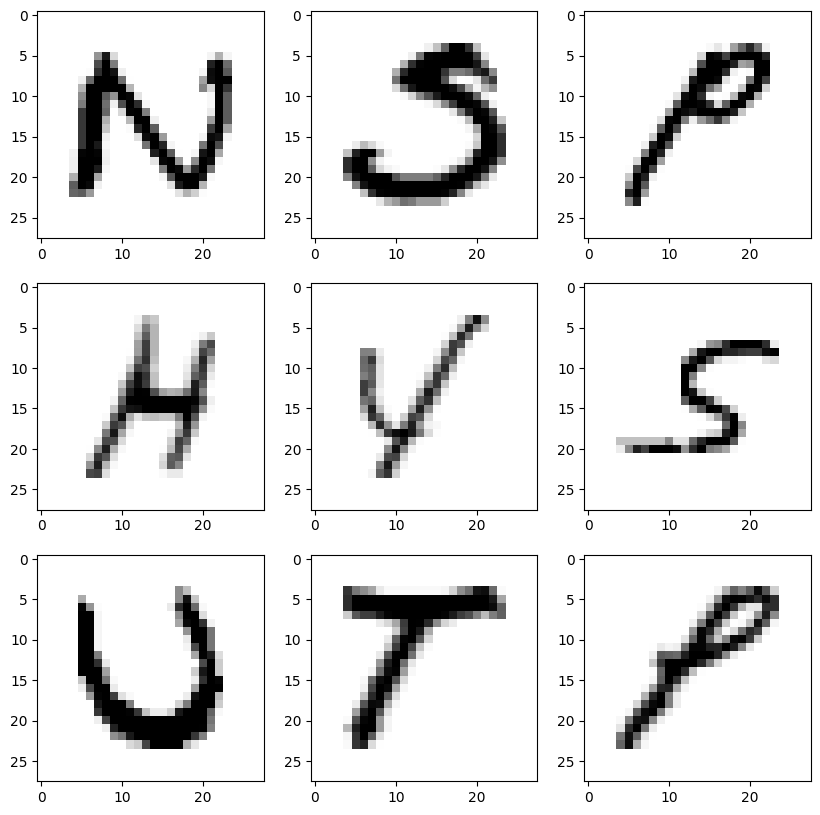

In [5]:
#Thresholding and shuffling
import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    # axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
    axes[i].imshow(shu,cmap="Greys")
plt.show()




In [6]:
#Reshaping for CNN
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

In [7]:
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)


New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [8]:
import tensorflow
from tensorflow.keras.utils import to_categorical


In [9]:
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')


In [10]:

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)


New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [12]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))


In [13]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))



In [14]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

In [15]:

model.add(Flatten())


In [16]:
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))


In [17]:
model.add(Dense(26,activation ="softmax"))


In [18]:

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

model.summary()


Epoch 1/5
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0985 - accuracy: 0.9724 - val_loss: 0.1028 - val_accuracy: 0.9733
Epoch 2/5
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0901 - accuracy: 0.9753 - val_loss: 0.0956 - val_accuracy: 0.9739
Epoch 3/5
9312/9312 [==============================] - 216s 23ms/step - loss: 0.0866 - accuracy: 0.9767 - val_loss: 0.1070 - val_accuracy: 0.9731
Epoch 4/5
9312/9312 [==============================] - 195s 21ms/step - loss: 0.0831 - accuracy: 0.9777 - val_loss: 0.1066 - val_accuracy: 0.9733
Epoch 5/5
9312/9312 [==============================] - 189s 20ms/step - loss: 0.0784 - accuracy: 0.9790 - val_loss: 0.0834 - val_accuracy: 0.9789
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                    

In [20]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


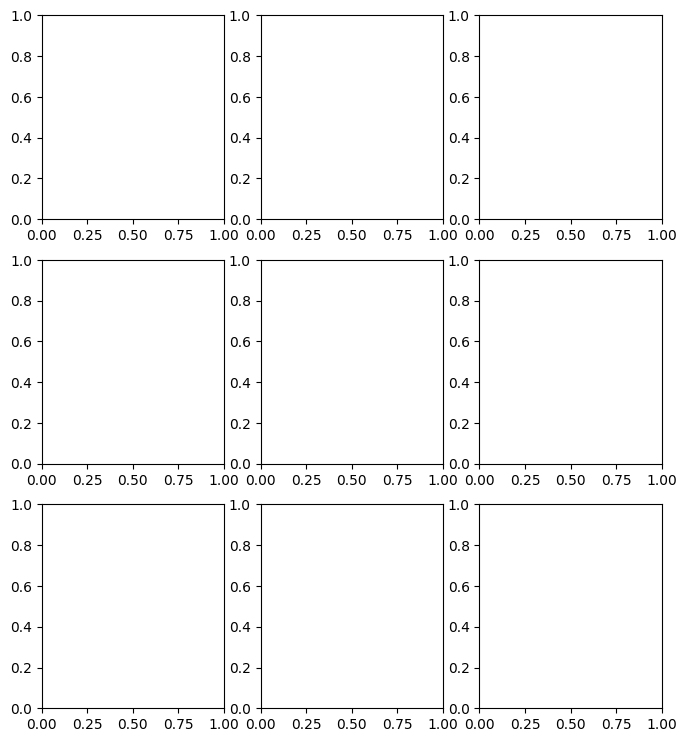

In [21]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()


In [22]:
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")

for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
